D:\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex v

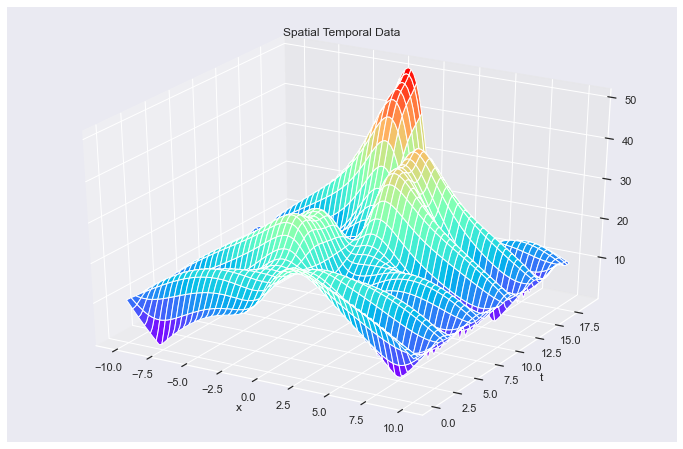

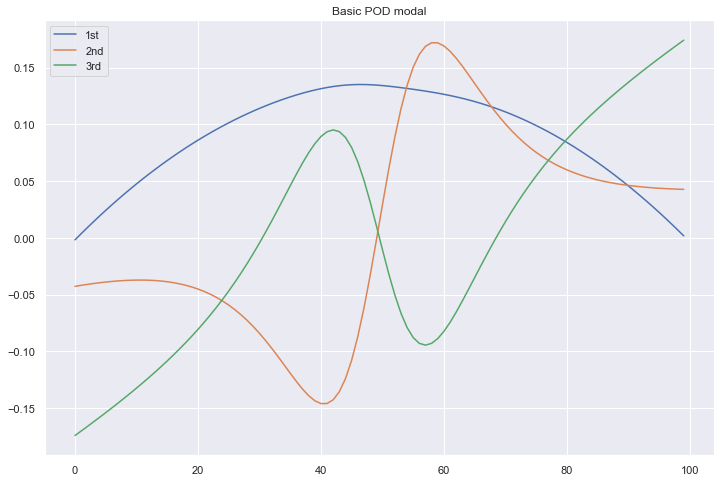

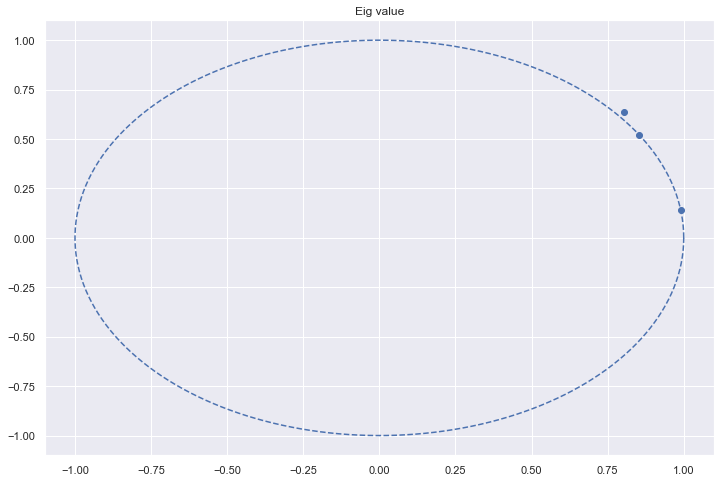

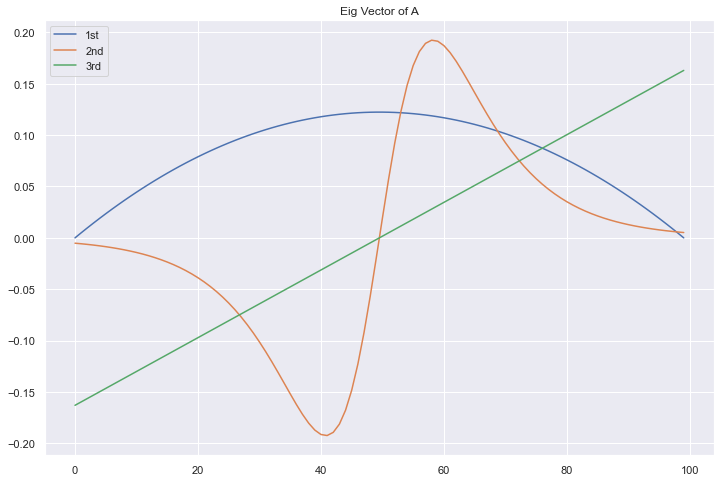

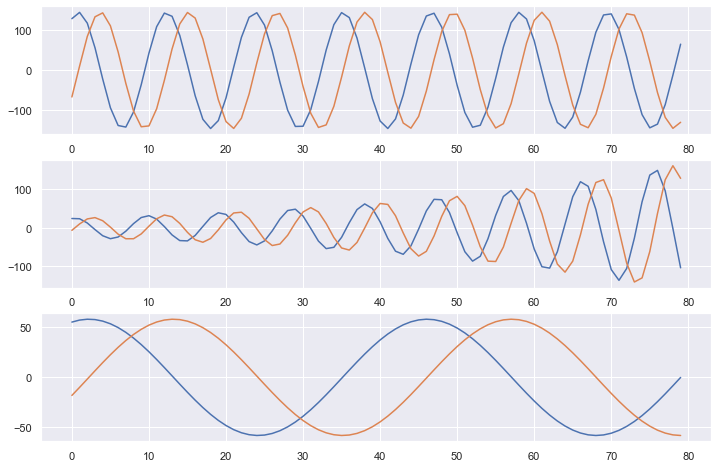

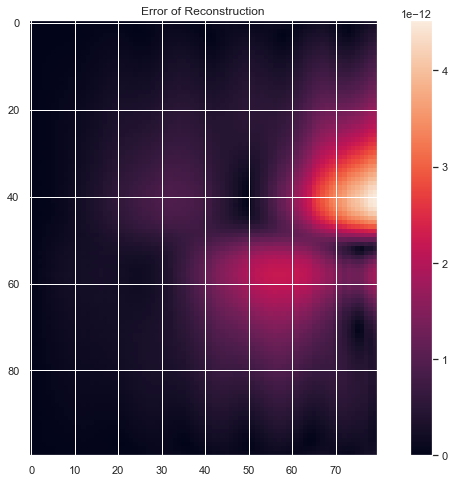

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.figsize']=12,8

sns.set()

# define time and space domains
x = np.linspace(-10, 10, 100)
t = np.linspace(0, 6 * np.pi, 80)
dt = t[2] - t[1]
Xm, Tm = np.meshgrid(x, t)

# create three spatiotemporal patterns
f1 = np.multiply(20 - 0.2 * np.power(Xm, 2), np.exp((2.3j) * Tm))
f2 = np.multiply(Xm, np.exp(0.6j * Tm))
f3 = np.multiply(5 * np.multiply(1 / np.cosh(Xm / 2), np.tanh(Xm / 2)), 2 * np.exp((0.1 + 2.8j) * Tm))

# combine signals and make data matrix
D = (f1 + f2 + f3).T

# create DMD input-output matrices
X = D[:, :-1]
Y = D[:, 1:]

# print(D)

# fig = plt.figure()
# ax = Axes3D(fig)
# ax.plot_surface(Xm, Tm, D.T, rstride=1, cstride=1, cmap='rainbow')

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(Xm, Tm, np.abs(D.T), cmap='rainbow')
ax.set_xlabel('x')
ax.set_ylabel('t')
plt.title("Spatial Temporal Data")
# plt.show()

# DMD核心部分 ********************************************************************
# SVD of input matrix
U2, Sig2, Vh2 = np.linalg.svd(X, False)

# rank-3 truncation
r = 3
U = U2[:, :r]
Sig = np.diag(Sig2)[:r, :r]
V = Vh2.conj().T[:, :r]

# 展示基本模态
plt.figure()
for i in range(r):
    plt.plot(U[:, i], label=str(i))
plt.legend(["1st", "2nd", "3rd"], loc='best')
plt.title("Basic POD modal")
# plt.show()

# build A tilde
Atil = np.dot(np.dot(np.dot(U.conj().T, Y), V), np.linalg.inv(Sig))
mu, W = np.linalg.eig(Atil)
plt.figure()
plt.scatter(mu.real, mu.imag)

theta = np.linspace(0, np.pi * 2, 200)
plt.plot(np.cos(theta), np.sin(theta), '--')
plt.title("Eig value")
# plt.show()

# build DMD modes (矩阵A的特征向量)
Phi = np.dot(np.dot(np.dot(Y, V), np.linalg.inv(Sig)), W)
plt.figure()
for i in range(r):
    plt.plot(Phi[:, i], label=str(i))
plt.legend(["1st", "2nd", "3rd"], loc='best')
plt.title("Eig Vector of A")
# plt.show()

# compute time evolution
b = np.dot(np.linalg.pinv(Phi), X[:, 0])  # 根据初始时刻算的B
Psi = np.zeros([r, len(t)], dtype='complex')
for i, _t in enumerate(t):
    Psi[:, i] = np.multiply(np.power(mu, _t / dt), b)

plt.figure()
plt.subplot(311)
plt.plot(Psi[0, :].real)
plt.plot(Psi[0, :].imag)
plt.subplot(312)
plt.plot(Psi[1, :].real)
plt.plot(Psi[1, :].imag)
plt.subplot(313)
plt.plot(Psi[2, :].real)
plt.plot(Psi[2, :].imag)

# plt.figure()
# for i in range(r):
#     plt.plot(Phi[:, i], label=str(i))
# plt.legend(["1st", "2nd", "3rd"], loc='best')
# plt.title("Eig Vector of A")
# # plt.show()

# compute DMD reconstruction
D2 = np.dot(Phi, Psi)
np.allclose(D, D2)  # True
plt.figure()
plt.imshow(np.abs(D2 - D))
plt.colorbar()
plt.title("Error of Reconstruction")
plt.show()


In [7]:
Tm

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.23860197,  0.23860197,  0.23860197, ...,  0.23860197,
         0.23860197,  0.23860197],
       [ 0.47720395,  0.47720395,  0.47720395, ...,  0.47720395,
         0.47720395,  0.47720395],
       ...,
       [18.37235197, 18.37235197, 18.37235197, ..., 18.37235197,
        18.37235197, 18.37235197],
       [18.61095395, 18.61095395, 18.61095395, ..., 18.61095395,
        18.61095395, 18.61095395],
       [18.84955592, 18.84955592, 18.84955592, ..., 18.84955592,
        18.84955592, 18.84955592]])

In [8]:
Xm

array([[-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       ...,
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ]])

In [39]:
(len(Phi),Phi[0].size),(len(Psi),Psi[0].size)

((100, 3), (3, 80))

In [38]:
len(Xm),Xm[0].size,len(Tm),Tm[0].size

(80, 100, 80, 100)